In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, auc
from sklearn.tree import DecisionTreeClassifier

In [28]:
data = pd.read_csv("train.csv")
df = pd.DataFrame(data)
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','Fare'],axis='columns',inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].median())
enc = OneHotEncoder(sparse_output=False)
sex_enc = enc.fit_transform(np.array(df["Sex"]).reshape(-1,1))
one_hot_df = pd.DataFrame(sex_enc,columns=['Female','Male'])
df_new = pd.concat([df, one_hot_df], axis=1)
df_new = df_new.drop("Sex", axis=1)
scaler = StandardScaler()
scaler.fit_transform(df_new)
df_new.head()

,Survived,Pclass,Age,Female,Male
0,0,3,22.0,0.0,1.0
1,1,1,38.0,1.0,0.0
2,1,3,26.0,1.0,0.0
3,1,1,35.0,1.0,0.0
4,0,3,35.0,0.0,1.0


In [23]:
X = df_new.drop("Survived",axis=1,inplace=False)
y = df_new["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

<b>Logistic Regression

In [22]:
model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")

F1-score: 0.7039
Accuracy: 0.7623
Precision: 0.6774
Recall: 0.7326


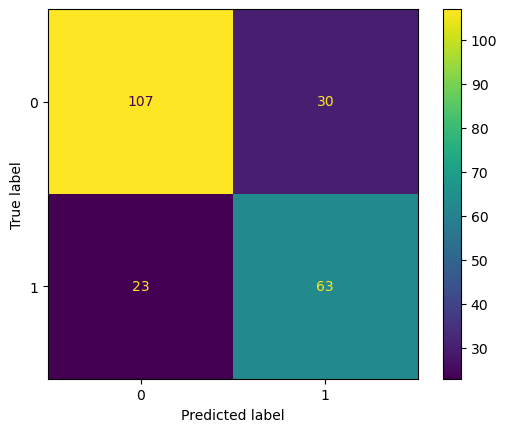

In [25]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

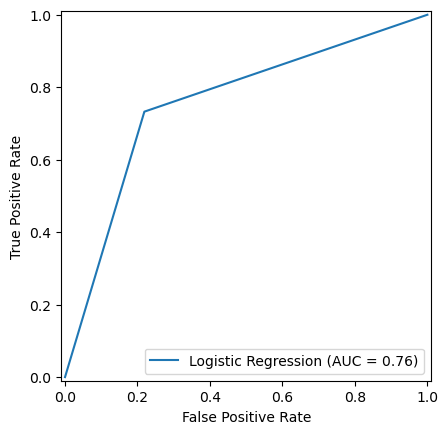

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()
plt.show()

<b>Decision Tree

In [ ]:
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")

F1-score: 0.7089
Accuracy: 0.7937
Precision: 0.7778
Recall: 0.6512


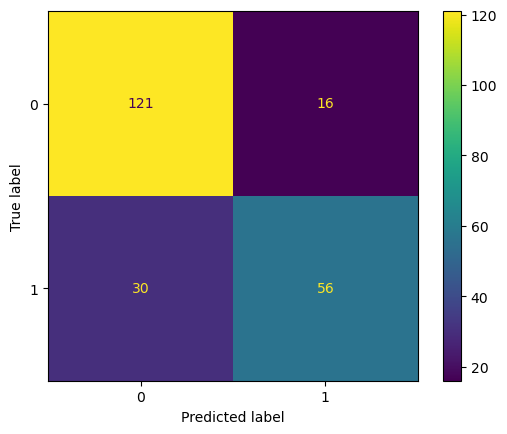

In [38]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

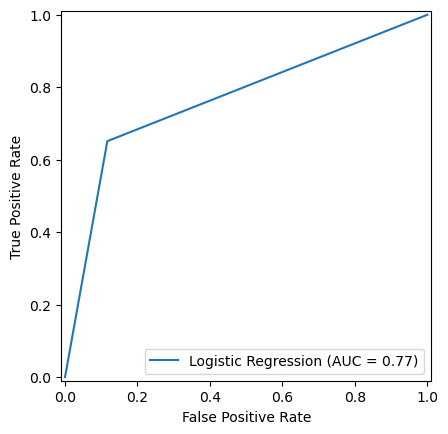

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()
plt.show()